# **Trabalho 1 - Reconhecimento de Padrões**
##### Renan Henrique Cardoso - 379013

In [ ]:
from scipy import io   # Utilizado somente a função loadmat para carregar arquivo .mat 
import pandas as pd    # Utilizado para converter o .mat e trabalhar com dataframe
import seaborn as sns  # Plotagem dos gráficos

### **Upload dos arquivos .mat**

In [ ]:
!curl -o Classe1.mat --remote-name -H 'Accept: application/vnd.github.v3.raw' --location https://github.com/cardosorrenan/reconhecimentopadroes-ufc/blob/master/Classe1.mat?raw=true
!curl -o Classe2.mat --remote-name -H 'Accept: application/vnd.github.v3.raw' --location https://github.com/cardosorrenan/reconhecimentopadroes-ufc/blob/master/Classe2.mat?raw=true

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   147  100   147    0     0    781      0 --:--:-- --:--:-- --:--:--   781
100   158  100   158    0     0    544      0 --:--:-- --:--:-- --:--:--   544
100  188k  100  188k    0     0   337k      0 --:--:-- --:--:-- --:--:-- 4182k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   147  100   147    0     0    936      0 --:--:-- --:--:-- --:--:--   936
100   158  100   158    0     0    574      0 --:--:-- --:--:-- --:--:--   574
100  188k  100  188k    0     0   274k      0 --:--:-- --:--:-- --:--:--  537k


### **Plot exemplo de sinal ECG**

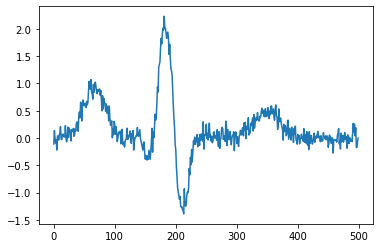

In [ ]:
ecgs = io.loadmat('Classe1.mat')['Classe1']  # Carrega para 'ecgs' o arquivo Classe1.mat
ecgs = pd.DataFrame(ecgs)                    # Transforma do formato dicionário para dataframe
sns.lineplot(data=ecgs[49])                  # Exibe o sinal exemplo 50

### **Plot exemplo de sinal de ruído**

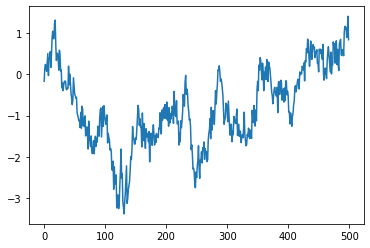

In [ ]:
noises = io.loadmat('Classe2.mat')['Classe2']  
noises = pd.DataFrame(noises)                 
sns.lineplot(data=noises[13])                  

### **Características dos sinais elegidas**:
  - **Média**
  - **Mediana**
  - **Variância**
  - **Curtose** (Kurtosis): Medida de forma que caracteriza o achatamento da curva da função de distribuição de probabilidade
  - **Assimetria** (Skewness): Medida da assimetria da distribuição de probabilidade de uma variável aleatória com valor real sobre sua média

### **Definindo vetor de características para os sinais de ECG**

In [ ]:
ecg_features = pd.DataFrame()               # Instancia um novo DataFrame
ecg_features['mean'] = ecgs.mean()          # Calcula a média de cada sinal ecg
ecg_features['median'] = ecgs.median()      # Calcula a mediana de cada sinal ecg
ecg_features['variance'] = ecgs.var()       # Calcula a variância de cada sinal ecg
ecg_features['kurtosis'] = ecgs.kurtosis()  # Calcula a curtose de cada sinal ecg
ecg_features['skewness'] = ecgs.skew()      # Calcula a assimetria de cada sinal ecg
print('ecg_features', ecg_features.shape)   # Exibe dimensão do dataframe
ecg_features.head()                         # Exibe uma amostra com 5 sinais

ecg_features (50, 5)


,mean,median,variance,kurtosis,skewness
0,0.054555,0.029564,0.044934,7.342880,0.712121
1,0.219775,0.121604,0.772401,7.525372,0.524423
2,0.006182,0.003271,0.000600,7.949215,0.598263
3,0.175649,0.092538,0.429686,7.802710,0.710876
4,0.249563,0.147590,0.927059,7.554545,0.695768


### **Definindo vetor de características para os sinais de ruído**

In [ ]:
noise_features = pd.DataFrame()
noise_features['mean'] = noises.mean()
noise_features['median'] = noises.median()
noise_features['var'] = noises.var()
noise_features['kurtosis'] = noises.kurtosis()
noise_features['skew'] = noises.skew()
print('noise_features', ecg_features.shape)
noise_features.head()

noise_features (50, 5)


,mean,median,var,kurtosis,skew
0,0.002110,0.003533,0.000173,-1.013604,-0.308855
1,0.087184,0.171650,0.300552,-0.987618,-0.332647
2,0.154969,0.307802,1.159563,-0.964448,-0.344421
3,0.043552,0.089607,0.093389,-0.975847,-0.357878
4,0.026380,0.055927,0.027955,-0.976322,-0.330218


### **Gráfico** - Kurtosis x Skewness
 - **Azul**: Sinal ECG
 - **Vermelho**: Sinal de Ruído

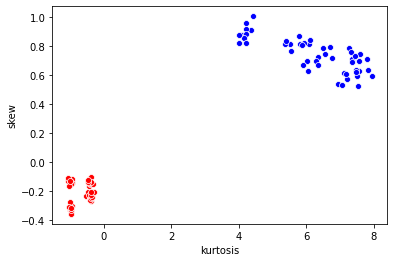

In [ ]:
sns.scatterplot(x=ecg_features['kurtosis'], y=ecg_features['skew'], color='blue')
sns.scatterplot(x=noise_features['kurtosis'], y=noise_features['skew'], color='red')